In [29]:
import pandas as pd
import numpy as np

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
user = pd.read_csv('user_table.csv')
user.head(3)

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male


In [32]:
home_page = pd.read_csv("home_page_table.csv")
home_page.head(3)

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page


In [33]:
search_page = pd.read_csv("search_page_table.csv")
search_page.head(3)

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page


In [34]:
payment_page = pd.read_csv("payment_page_table.csv")
payment_page.head(3)

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page


In [35]:
payment_confirm = pd.read_csv("payment_confirmation_table.csv")
payment_confirm.head(3)

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page


# Analyze on the Conversion rate

## Merge the datasets into a full table

In [36]:
full_table = pd.merge(left = user, right = home_page, how = 'left', on = 'user_id')
full_table = pd.merge(left = full_table, right = search_page, how = 'left', on = 'user_id', suffixes=('_home', '_search'))
full_table = pd.merge(left = full_table, right = payment_page, how = 'left', on = 'user_id')
full_table = pd.merge(left = full_table, right = payment_confirm, how = 'left', on = 'user_id', suffixes=('_payment', '_confirmation'))
full_table.head()

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [37]:
full_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90400 entries, 0 to 90399
Data columns (total 8 columns):
user_id              90400 non-null int64
date                 90400 non-null object
device               90400 non-null object
sex                  90400 non-null object
page_home            90400 non-null object
page_search          45200 non-null object
page_payment         6030 non-null object
page_confirmation    452 non-null object
dtypes: int64(1), object(7)
memory usage: 6.2+ MB


In [38]:
all_user = len(full_table['user_id'])
search_user = len(full_table[(~full_table["page_search"].isnull())])
pay_user = len(full_table[(~full_table["page_payment"].isnull())])
confirm_user = len(full_table[(~full_table["page_confirmation"].isnull())])

In [39]:
full_table["device"].value_counts()

Desktop    60200
Mobile     30200
Name: device, dtype: int64

### Get the number of users in different stage for differnt devices

In [40]:
all_user_desktop = len(full_table[(full_table['device']=="Desktop")])
search_user_desktop = len(full_table[(~full_table["page_search"].isnull())&(full_table['device']=="Desktop")])
pay_user_desktop = len(full_table[(~full_table["page_payment"].isnull())&(full_table['device']=="Desktop")])
confirm_user_desktop = len(full_table[(~full_table["page_confirmation"].isnull())&(full_table['device']=="Desktop")])

all_user_mobile = len(full_table[(full_table['device']=="Mobile")])
search_user_mobile = len(full_table[(~full_table["page_search"].isnull())&(full_table['device']=="Mobile")])
pay_user_mobile = len(full_table[(~full_table["page_payment"].isnull())&(full_table['device']=="Mobile")])
confirm_user_mobile = len(full_table[(~full_table["page_confirmation"].isnull())&(full_table['device']=="Mobile")])



### Get the number of users in different stage for differnt genders


In [41]:
full_table

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
90395,307667,2015-03-30,Desktop,Female,home_page,NaN,NaN,NaN
90396,642989,2015-02-08,Desktop,Female,home_page,search_page,NaN,NaN
90397,659645,2015-04-13,Desktop,Male,home_page,search_page,NaN,NaN
90398,359779,2015-03-23,Desktop,Male,home_page,NaN,NaN,NaN


In [42]:
all_user_male = len(full_table[(full_table['sex']=="Male")])
search_user_male = len(full_table[(~full_table["page_search"].isnull())&(full_table['sex']=="Male")])
pay_user_male = len(full_table[(~full_table["page_payment"].isnull())&(full_table['sex']=="Male")])
confirm_user_male = len(full_table[(~full_table["page_confirmation"].isnull())&(full_table['sex']=="Male")])

all_user_female = len(full_table[(full_table['sex']=="Female")])
search_user_female = len(full_table[(~full_table["page_search"].isnull())&(full_table['sex']=="Female")])
pay_user_female = len(full_table[(~full_table["page_payment"].isnull())&(full_table['sex']=="Female")])
confirm_user_female = len(full_table[(~full_table["page_confirmation"].isnull())&(full_table['sex']=="Female")])



## Conversion Ratio for differnt groups at different stages

In [43]:
full_table.head(1)

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN


In [44]:
def conversion_rate(df):
    rates = []
    tmp = df[~df['page_home'].isnull()]
    rates.append(1 - tmp['page_search'].isnull().sum() / len(tmp))
    
    tmp = df[~df['page_search'].isnull()]
    rates.append(1 - tmp['page_payment'].isnull().sum() / len(tmp))
    
    tmp = df[~df['page_payment'].isnull()]
    rates.append(1 - tmp['page_confirmation'].isnull().sum() / len(tmp))
    
    return rates


### Overall Conversion Rate

In [111]:
len(full_table[~full_table["page_search"]==0])

0

In [122]:
full_table[(full_table["page_confirmation"] == 1)]

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
61,13830,2015-02-05,Desktop,Male,1,1,1,1
261,559850,2015-02-11,Mobile,Female,1,1,1,1
402,638114,2015-01-09,Mobile,Female,1,1,1,1
412,581956,2015-02-25,Mobile,Male,1,1,1,1
785,337704,2015-01-31,Desktop,Male,1,1,1,1
...,...,...,...,...,...,...,...,...
89155,30217,2015-02-11,Mobile,Male,1,1,1,1
89244,869943,2015-02-15,Mobile,Male,1,1,1,1
90163,370509,2015-01-18,Desktop,Male,1,1,1,1
90295,528989,2015-02-28,Mobile,Male,1,1,1,1


In [45]:
overall_ratio = conversion_rate(full_table)
names = ['home', 'search', 'payment']
conversion_dict = {'Stage': ['home_to_search', 'search_to_payment', 'payment_to_confirm'], 'Conversion Rate': overall_ratio}
overall_rate = pd.DataFrame(conversion_dict, columns=['Stage', 'Conversion Rate'])

overall_rate

,Stage,Conversion Rate
0,home_to_search,0.500000
1,search_to_payment,0.133407
2,payment_to_confirm,0.074959


# Conduct Clustering for user segementation

## Data process

In [46]:
full_table.head(3)

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN


In [47]:
# Define function to transform columns value
def transform_to_binary(x):
    if type(x) == str:
        x = 1
    elif type(x) == float:
        x = 0
    return x

In [48]:
full_table["page_home"] = full_table["page_home"].apply(transform_to_binary)
full_table["page_search"] = full_table["page_search"].apply(transform_to_binary)
full_table["page_payment"] = full_table["page_payment"].apply(transform_to_binary)
full_table["page_confirmation"] = full_table["page_confirmation"].apply(transform_to_binary)

In [50]:
full_table_dummy = pd.get_dummies(data = full_table, columns = ["sex","device"])

In [52]:
full_table_dummy.drop(["user_id","date"], axis=1,inplace=True)

## Build clustering model

In [71]:
from sklearn.cluster import KMeans
kmeans_3 = KMeans(n_clusters=3, random_state=0).fit(full_table_dummy)


In [81]:
cluster_1 = full_table.loc[kmeans_3.labels_ == 0,:]
cluster_2 = full_table.loc[kmeans_3.labels_ == 1,:]
cluster_3 = full_table.loc[kmeans_3.labels_ == 2,:]


In [82]:
# Number of users in each cluster
pd.Series(kmeans_3.labels_).value_counts()

0    30203
2    30200
1    29997
dtype: int64

In [94]:
cluster_1.head(3)

,user_id,date,device,sex,page_home,page_search,page_payment,page_confirmation
1,756838,2015-01-13,Desktop,Male,1,0,0,0
2,568983,2015-04-09,Desktop,Male,1,1,0,0
4,537909,2015-01-15,Desktop,Male,1,0,0,0


## Explore the Clusters

In [123]:
# Define another function to compute conversion rate for 0-1 variable
def conversion_rate_for_binary(df):
    rates = []
    tmp = df[df['page_home'] == 1]
    rates.append(len(tmp[tmp['page_search'] == 1]) / len(tmp))

    tmp = df[df['page_search'] == 1]
    rates.append(len(tmp[tmp['page_payment'] == 1]) / len(tmp))
    
    tmp = df[df['page_payment'] == 1]
    rates.append(len(tmp[tmp['page_confirmation'] == 1]) / len(tmp))

    
    return rates


In [126]:
conversion_rate_for_binary(cluster_3)

[0.5, 0.2, 0.1]

### Cluster 1

In [96]:
# Male ratio
cluster_1_male_ratio = len(cluster_1[cluster_1["sex"]=="Male"]) / len(cluster_1)
cluster_1_male_ratio 

1.0

In [97]:
# Device ratio
cluster_1_male_ratio = len(cluster_1[cluster_1["device"]=="Desktop"]) / len(cluster_1)
cluster_1_male_ratio 

1.0

In [134]:
# Conversion ratio for cluster 1
overall_ratio_cluster_1 = conversion_rate_for_binary(cluster_1)
names = ['home', 'search', 'payment']
conversion_dict = {'Stage': ['home_to_search', 'search_to_payment', 'payment_to_confirm'], 'Conversion Rate': overall_ratio_cluster_1}
overall_ratio_cluster_1 = pd.DataFrame(conversion_dict, columns=['Stage', 'Conversion Rate'])

overall_ratio_cluster_1


,Stage,Conversion Rate
0,home_to_search,0.496937
1,search_to_payment,0.098608
2,payment_to_confirm,0.051351


### Cluster 2

In [102]:
# Male ratio
cluster_2_male_ratio = len(cluster_2[cluster_2["sex"]=="Male"]) / len(cluster_2)
cluster_2_male_ratio 

0.0

In [103]:
# Device ratio
cluster_2_male_ratio = len(cluster_2[cluster_2["device"]=="Desktop"]) / len(cluster_2)
cluster_2_male_ratio 

1.0

In [135]:
# Conversion ratio for cluster 2
overall_ratio_cluster_2 = conversion_rate_for_binary(cluster_2)
names = ['home', 'search', 'payment']
conversion_dict = {'Stage': ['home_to_search', 'search_to_payment', 'payment_to_confirm'], 'Conversion Rate': overall_ratio_cluster_2}
overall_ratio_cluster_2 = pd.DataFrame(conversion_dict, columns=['Stage', 'Conversion Rate'])

overall_ratio_cluster_2


,Stage,Conversion Rate
0,home_to_search,0.503084
1,search_to_payment,0.101385
2,payment_to_confirm,0.048366


### Cluster 3

In [104]:
# Male ratio
cluster_3_male_ratio = len(cluster_3[cluster_3["sex"]=="Male"]) / len(cluster_3)
cluster_3_male_ratio 

0.500728476821192

In [105]:
# Device ratio
cluster_3_male_ratio = len(cluster_3[cluster_3["device"]=="Desktop"]) / len(cluster_3)
cluster_3_male_ratio 

0.0

In [136]:
# Conversion ratio for cluster 3
overall_ratio_cluster_3 = conversion_rate_for_binary(cluster_3)
names = ['home', 'search', 'payment']
conversion_dict = {'Stage': ['home_to_search', 'search_to_payment', 'payment_to_confirm'], 'Conversion Rate': overall_ratio_cluster_3}
overall_ratio_cluster_3 = pd.DataFrame(conversion_dict, columns=['Stage', 'Conversion Rate'])

overall_ratio_cluster_3


,Stage,Conversion Rate
0,home_to_search,0.5
1,search_to_payment,0.2
2,payment_to_confirm,0.1


In [140]:
overall_ratio_cluster_3["Conversion Rate"]

0    0.5
1    0.2
2    0.1
Name: Conversion Rate, dtype: float64

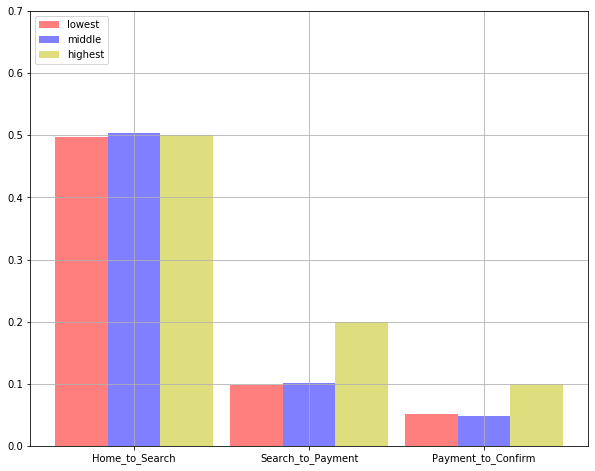

In [151]:
# Plot the conversion rate for different clusters
plt.figure(figsize=(10,8))

x_pos = [1,2,3]
width =0.3
plt.bar(x_pos,overall_ratio_cluster_1["Conversion Rate"],width,alpha=0.5,color='r',label=['Cluster 1'])
plt.bar([i + width for i in x_pos],overall_ratio_cluster_2["Conversion Rate"], width,alpha=0.5,color = 'b',label=['Cluster 2'])
plt.bar([i + width*2 for i in x_pos],overall_ratio_cluster_3["Conversion Rate"],width,alpha=0.5,color = 'y',label=['Cluster 3'])
plt.legend(['lowest', 'middle', 'highest'], loc='upper left')
plt.xticks([1.3,2.3,3.3],['Home_to_Search','Search_to_Payment','Payment_to_Confirm'])
plt.ylim([0,0.7])

plt.grid()
# first arg of xticks is the location of x-labels and the 2nd arg of xticks is the name of x-labels

